# Лабораторная работа 3

### Цель: предсказывать цену билета на корабле Титаник
### Задачи

* Обучить логистическую регрессию, подобрать параметры
* Сравним результаты L1, L2, оценить веса признаков
* Провести отбор признаков с помощью L1, регуляризации, подобрать оптимальынй С, объяcнить результат

Загрузим данные из ЛР 2 и поменяем целевой параметр. (Заменяем факт выживания на цену билета)

In [1]:
#импорт необходимых модулей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

# результат по выживани.
trainSurvivedPath = '/home/alex/Downloads/bmstuML/dataMl/trainSurvived.plk'
testSurvivedPath = '/home/alex/Downloads/bmstuML/dataMl/testSurvived.plk'

y_train = pd.read_pickle(trainSurvivedPath)
y_test = pd.read_pickle(testSurvivedPath)


# подготовленные данные из ЛР 2
trainDataPath = '/home/alex/Downloads/bmstuML/dataMl/trainData.plk'
testDataPath = '/home/alex/Downloads/bmstuML/dataMl/testData.plk'

X_train = pd.read_pickle(trainDataPath)
X_test = pd.read_pickle(testDataPath)

# теперь цель - это цена, а не выживание
X_train['Survived'] = y_train
X_test['Survived'] = y_test

y_train = X_train['Fare']
y_test = X_test['Fare']

X_train = X_train.drop(['Fare'], axis='columns')
X_test = X_test.drop(['Fare'], axis='columns')

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       714 non-null    float64
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    float64
 3   Parch     714 non-null    float64
 4   is_S      714 non-null    float64
 5   is_C      714 non-null    float64
 6   is_Q      714 non-null    float64
 7   Survived  714 non-null    float64
dtypes: float64(8)
memory usage: 44.8 KB


Обучим логистическую регрессию и посмотрим результат

score_linreg: 0.2604852579447866
сoefficients: [-0.00051246  0.1000967   0.08192158  0.11931857 -0.06492836  0.00403586
 -0.08057696  0.04503603]


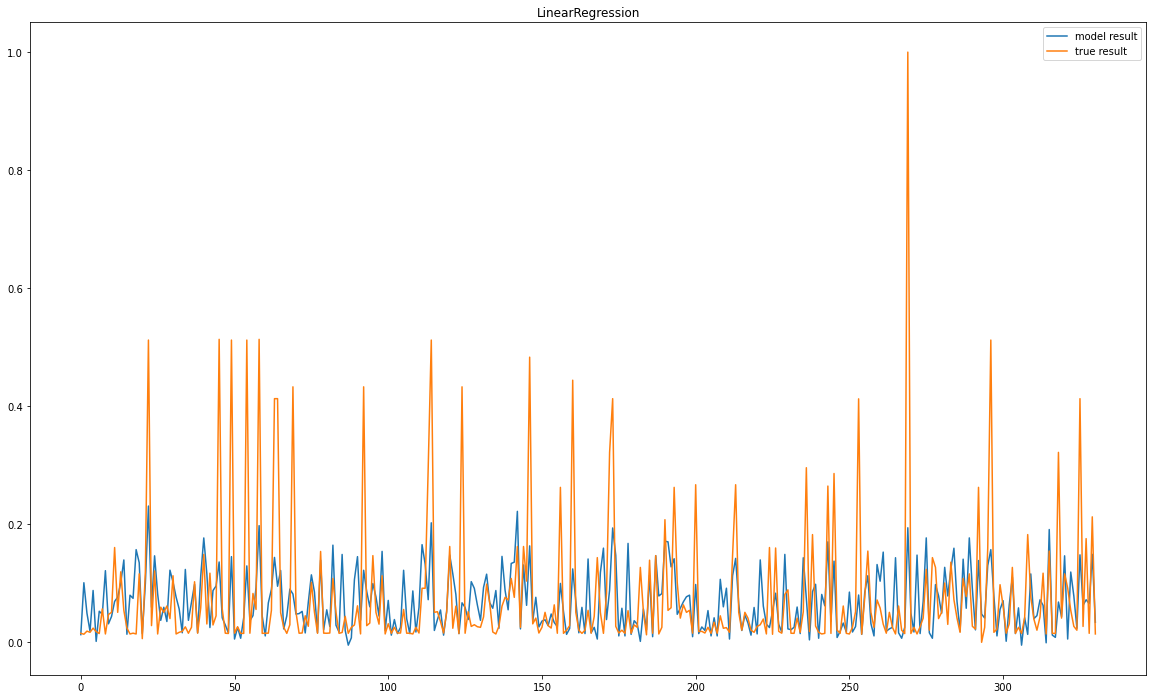

In [22]:
from sklearn.linear_model import LinearRegression

def linear_reg(y_dataTrain, dataTrain, y_dataTest, dataTest, power, models_to_plot):
    
    linreg = LinearRegression(normalize=False) # нормализация уже была в шагах ЛР 2
    linreg.fit(dataTrain, y_dataTrain)
    
    
    dataTrain.head(4)
    dataTest.head(4)
    
    score_linreg = linreg.score(dataTest, y_dataTest)
    
    print('score_linreg:', score_linreg)
    
    print('сoefficients:', linreg.coef_)
    
    y_pred = linreg.predict(dataTest)
    
    rcParams['figure.figsize'] = 20,12
    

    x = np.arange(len(y_pred))
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(x, y_pred, label='model result')
    ax.plot(x, y_dataTest, label='true result')
    plt.title('LinearRegression')
    ax.legend()
    plt.show()
    

    
linear_reg(y_train, X_train, y_test, X_test, 2,2)
    

Результат 0.26 достаточно далекий от ожидаемого.
Заметим, что фактический результат цены билета сильно выше предсказанного у некоторых пассажиров. Это сильно влияет на оценку score. Очень богатых пассажиров выкинуть из данных мы не можем, так как это не выбросы, На корабле имеется определенный процент кают для очень обеспеченых пассажиров.

Попроубем убрать лишние данные. Будем считать, что в каждом порте уровень обеспеченности пассажиров одинаковый. 

score_linreg: 0.15552173592091045
сoefficients: [-0.0008277   0.10788145  0.07735828  0.11747438  0.05635839]


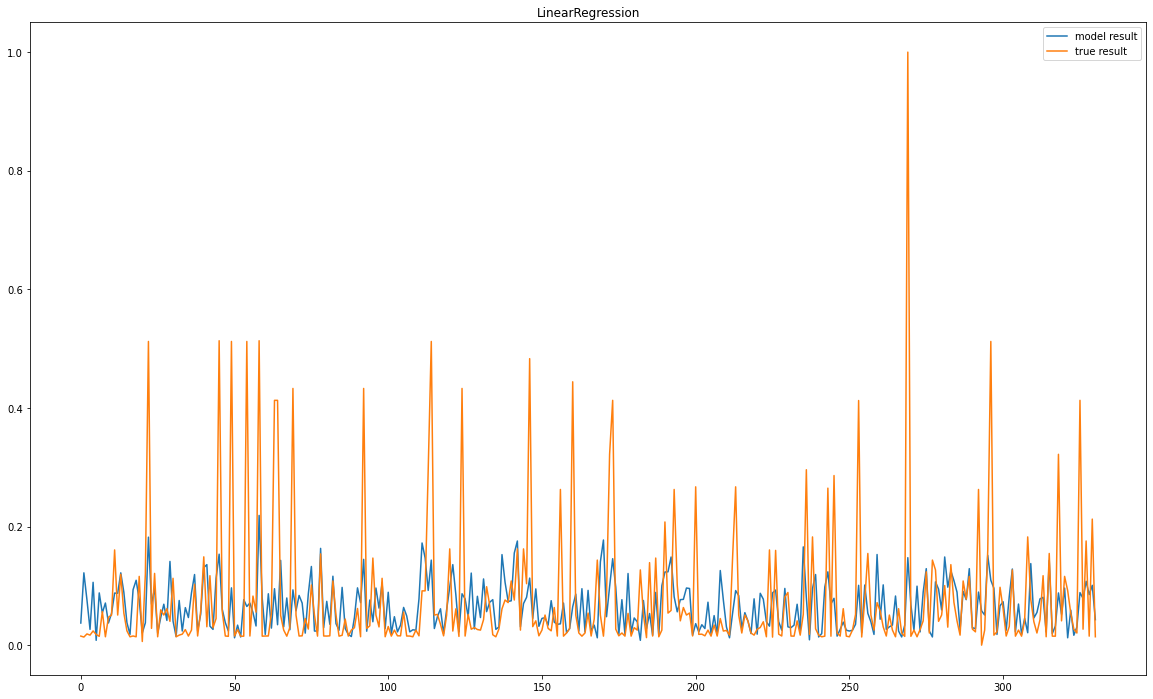

In [24]:
X_train = X_train.drop(['is_S','is_C','is_Q'], axis='columns')
X_test = X_test.drop(['is_S','is_C','is_Q'], axis='columns')

linear_reg(y_train, X_train, y_test, X_test, 2,2)


Предположение об уровене обеспеченности пассажиров в каждом порте оказалось неверным.

# 